In [44]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import sklearn
from sklearn import decomposition
from sklearn.cross_validation  import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

#Note to self:
#train_test_split is the process of spliting arrays or matrices into random train and test subsets
#StandardScaler standardizes features by removing the mean and scaling to unit variance
#OneHotEncoder converts features to so-called binary
#LabelEncoder encodes labels from 0 to n-1. Disadvantage is that it assumes higher the categorical value, better the category
#PCA -> Principal component analysis to remove redundant variables

%matplotlib inline
rcParams['figure.figsize'] = 9,5
sb.set_style('whitegrid')

In [13]:
flights = pd.read_csv("C:\Users\Sim Keng Ying\Desktop/nycflights13_flights.csv")
weather = pd.read_csv("C:\Users\Sim Keng Ying\Desktop/nycflights13_weather.csv")
airports = pd.read_csv("C:\Users\Sim Keng Ying\Desktop/nycflights13_airport.csv")

df_with_weather = pd.merge(flights, weather, how='left', on=['year','month', 'day', 'hour'])
df_overall = pd.merge(df_with_weather, airports, how='left', left_on='dest', right_on='faa')
df_overall = df_overall.dropna()
df_overall

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,visib,time_hour_y,faa,name,lat,lon,alt,tz,dst,tzone
2,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,10.0,2013-01-01T10:00:00Z,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago
5,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,10.0,2013-01-01T10:00:00Z,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago
8,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,10.0,2013-01-01T10:00:00Z,MIA,Miami Intl,25.793250,-80.290556,8.0,-5.0,A,America/New_York
14,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01T11:00:00Z,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
17,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,...,10.0,2013-01-01T10:00:00Z,ORD,Chicago Ohare Intl,41.978603,-87.904842,668.0,-6.0,A,America/Chicago
20,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01T11:00:00Z,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
23,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01T11:00:00Z,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
26,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,...,10.0,2013-01-01T11:00:00Z,MCO,Orlando Intl,28.429394,-81.308994,96.0,-5.0,A,America/New_York
29,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,...,10.0,2013-01-01T11:00:00Z,ORD,Chicago Ohare Intl,41.978603,-87.904842,668.0,-6.0,A,America/Chicago
32,2013,1,1,558.0,600,-2.0,849.0,851,-2.0,B6,...,10.0,2013-01-01T11:00:00Z,PBI,Palm Beach Intl,26.683161,-80.095589,19.0,-5.0,A,America/New_York


In [28]:
features =  ['month','day','dep_time','arr_time','carrier','dest','air_time','distance', 
             'lat', 'lon', 'alt',  'dewp', 'humid', 'wind_speed', 'wind_gust', 
             'precip', 'pressure', 'visib' ]
features_vector = df_overall[features]
pd.options.mode.chained_assignment = None 
features_vector['carrier'] = pd.factorize(features_vector['carrier'])[0]
features_vector['dest'] = pd.factorize(features_vector['dest'])[0]

features_vector

#Note to self:
#factorize is to obtain numeric representation of an array
#features vector is simply just a collection of the measured values of a particular feature
#pd.options.mode.chained_assignment is to make it load faster

,month,day,dep_time,arr_time,carrier,dest,air_time,distance,lat,lon,alt,dewp,humid,wind_speed,wind_gust,precip,pressure,visib
2,1,1,517.0,830.0,0,0,227.0,1400,29.984433,-95.341442,97.0,24.98,54.81,14.96014,21.86482,0.0,1011.4,10.0
5,1,1,533.0,850.0,0,0,227.0,1416,29.984433,-95.341442,97.0,24.98,54.81,14.96014,21.86482,0.0,1011.4,10.0
8,1,1,542.0,923.0,1,1,160.0,1089,25.793250,-80.290556,8.0,24.98,54.81,14.96014,21.86482,0.0,1011.4,10.0
14,1,1,554.0,812.0,2,2,116.0,762,33.636719,-84.428067,1026.0,24.98,54.81,16.11092,23.01560,0.0,1011.7,10.0
17,1,1,554.0,740.0,0,3,150.0,719,41.978603,-87.904842,668.0,24.98,54.81,14.96014,21.86482,0.0,1011.4,10.0
20,1,1,555.0,913.0,3,4,158.0,1065,26.072583,-80.152750,9.0,24.98,54.81,16.11092,23.01560,0.0,1011.7,10.0
23,1,1,557.0,709.0,4,5,53.0,229,38.944533,-77.455811,313.0,24.98,54.81,16.11092,23.01560,0.0,1011.7,10.0
26,1,1,557.0,838.0,3,6,140.0,944,28.429394,-81.308994,96.0,24.98,54.81,16.11092,23.01560,0.0,1011.7,10.0
29,1,1,558.0,753.0,1,3,138.0,733,41.978603,-87.904842,668.0,24.98,54.81,16.11092,23.01560,0.0,1011.7,10.0
32,1,1,558.0,849.0,3,7,149.0,1028,26.683161,-80.095589,19.0,24.98,54.81,16.11092,23.01560,0.0,1011.7,10.0


In [29]:
#note to self: Rmb to normalize!! (standard normal distribution)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_vector)
scaled_features

array([[-1.41198365, -1.69037033, -2.20154715, ..., -0.09967349,
        -0.57737912,  0.17933276],
       [-1.41198365, -1.69037033, -2.16224724, ..., -0.09967349,
        -0.57737912,  0.17933276],
       [-1.41198365, -1.69037033, -2.14014104, ..., -0.09967349,
        -0.57737912,  0.17933276],
       ...,
       [ 0.88605621,  1.25306155, -0.62709455, ..., -0.09967349,
         0.20010749,  0.17933276],
       [ 0.88605621,  1.25306155, -0.47726365, ..., -0.09967349,
         0.20010749,  0.17933276],
       [ 0.88605621,  1.25306155, -0.46252618, ..., -0.09967349,
         0.20010749,  0.17933276]])

In [46]:
pca = decomposition.PCA()
X_r = pca.fit_transform(scaled_features)

pca.explained_variance_ratio_

array([0.17742994, 0.12468243, 0.11243781, 0.10006699, 0.0860605 ,
       0.06470207, 0.05631763, 0.05197731, 0.0504524 , 0.03834005,
       0.03735913, 0.0325164 , 0.02520441, 0.01797262, 0.01628286,
       0.00693076, 0.00093681, 0.00032987])

In [47]:
pca.explained_variance_ratio_.sum()

1.0

In [52]:
x = 0.17742994 + 0.12468243 + 0.11243781 + 0.10006699 + 0.0860605 + 0.06470207 + 0.05631763
x

0.7216973699999999

In [54]:
pca = PCA(n_components=7)
X_r = pca.fit_transform(scaled_features)
X_r

array([[ 1.37099434,  0.35370471,  0.40989672, ..., -0.10225415,
        -0.316093  , -2.29527726],
       [ 1.3867367 ,  0.34737115,  0.40232307, ..., -0.1276001 ,
        -0.30440412, -2.29448237],
       [ 0.2766169 ,  0.32344788,  0.43015533, ..., -0.82629892,
        -0.25897029, -2.27161603],
       ...,
       [ 3.27649198,  1.29253223,  0.38354819, ...,  0.32891133,
        -0.8812644 ,  1.48675869],
       [ 0.35973387,  1.25033552,  0.51998238, ..., -1.88740046,
        -0.88485428,  1.44703506],
       [ 1.22733408,  1.28515896,  0.50578654, ..., -1.21221203,
        -0.94494493,  1.42107958]])

explained variance ratio (first two components): [0.17742994 0.12468243 0.11243781 0.10006699 0.0860605  0.06470207
 0.05631763]


Text(0.5,1,'PCA of NYCflights13 dataset')

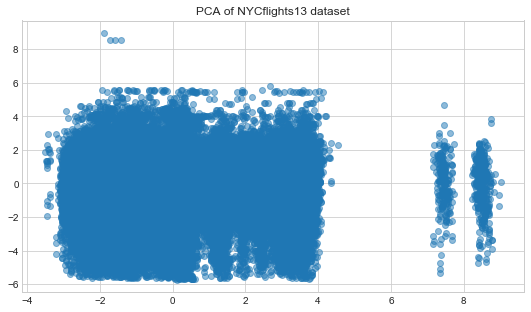

In [64]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()

plt.scatter(X_r[:,0], X_r[:,1], alpha = 0.5)
plt.title('PCA of NYCflights13 dataset')

Practicing basic PCA on Iris Dataset

In [67]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
variable_names = iris.feature_names
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [68]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [69]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361590,-0.082269,0.856572,0.358844
1,0.656540,0.729712,-0.175767,-0.074706
2,-0.580997,0.596418,0.072524,0.549061
3,0.317255,-0.324094,-0.479719,0.751121


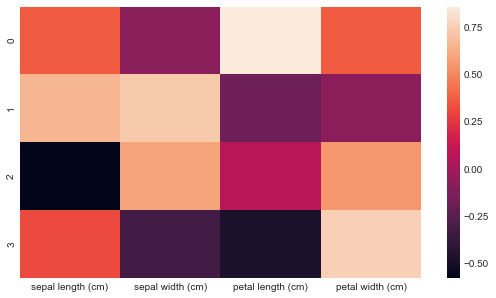

In [70]:
sb.heatmap(comps)